In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from math import sqrt
dataframe = pd.read_csv('house_rental_data.csv',index_col=0)
dataframe

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
644,1359.156,7,15,3,2,2,45000
645,377.148,4,10,1,1,1,24800
646,740.064,13,14,1,1,1,45000
647,1707.840,3,14,3,2,2,65000


In [2]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 1 to 648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 40.3 KB


In [3]:
dataframe.drop_duplicates(inplace=True)

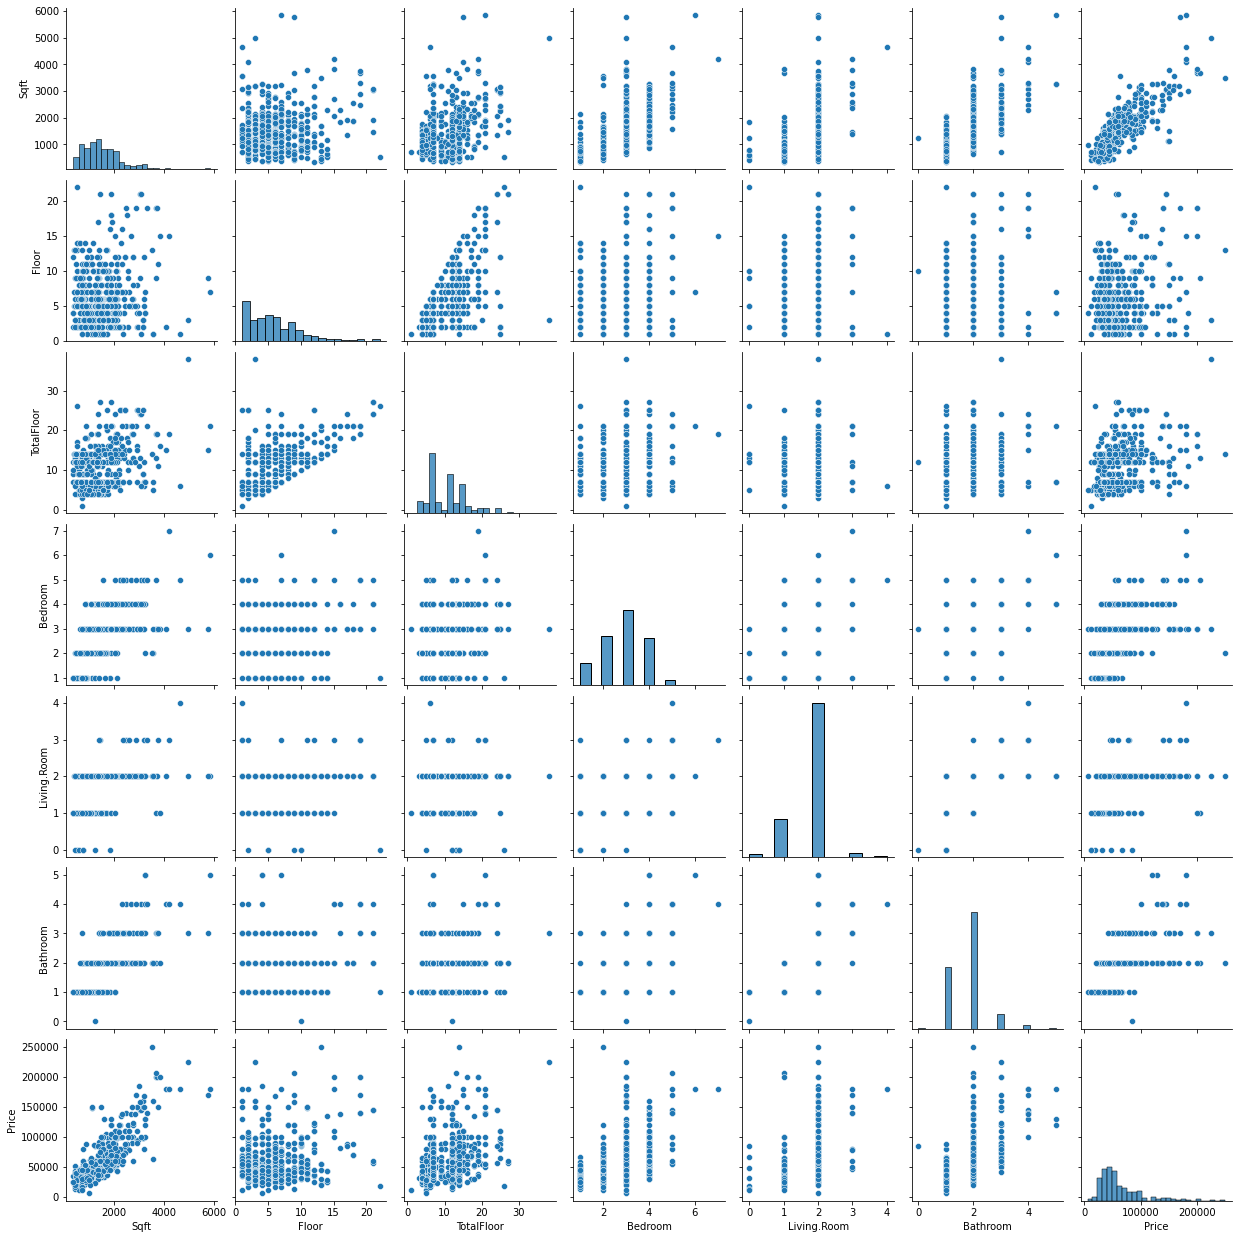

In [4]:
sns.pairplot(data=dataframe)

<AxesSubplot:xlabel='Sqft', ylabel='Price'>

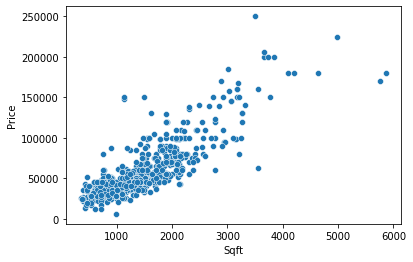

In [5]:
sns.scatterplot(x=dataframe['Sqft'], y=dataframe['Price'])

<AxesSubplot:>

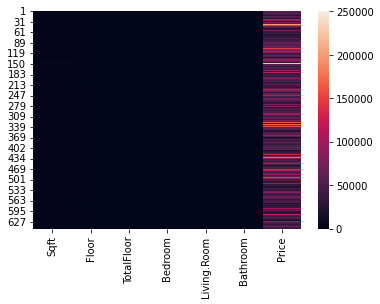

In [7]:
sns.heatmap(data=dataframe)

In [6]:
dataframe.corr()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Sqft,1.000000,0.118568,0.304795,0.613589,0.458412,0.725545,0.823781
Floor,0.118568,1.000000,0.552552,0.039165,-0.025554,0.088359,0.226952
TotalFloor,0.304795,0.552552,1.000000,0.079984,0.023659,0.141258,0.336982
Bedroom,0.613589,0.039165,0.079984,1.000000,0.527463,0.650881,0.465091
Living.Room,0.458412,-0.025554,0.023659,0.527463,1.000000,0.559363,0.332643
Bathroom,0.725545,0.088359,0.141258,0.650881,0.559363,1.000000,0.604204
Price,0.823781,0.226952,0.336982,0.465091,0.332643,0.604204,1.000000


D:\Softwares\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sqft'>

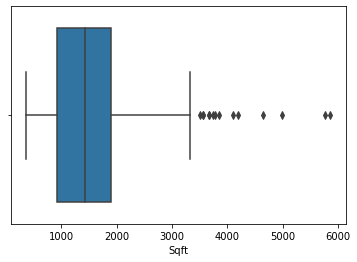

In [7]:
sns.boxplot(dataframe['Sqft'])

D:\Softwares\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

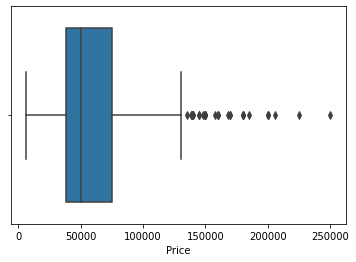

In [8]:
 sns.boxplot(dataframe['Price'])

In [9]:
X = dataframe.iloc[:,0:6]
Y = dataframe.iloc[:,6]

In [10]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30, random_state=4)
lr = LinearRegression()
lr.fit(X_train, y_train) 
predicted=lr.predict(X_test)
sqrt(mean_squared_error(y_test,predicted))

21005.207648598356

In [14]:
lr.predict([X[5]])

array([51414.44070248])

In [15]:
Y[5]

45000

In [16]:
lr = Lasso()
lr.fit(X_train, y_train) 
predicted=lr.predict(X_test)
sqrt(mean_squared_error(y_test,predicted))

21005.173265572335

In [17]:
lr.predict([X[5]])

array([51417.50409142])

In [18]:
lr = Ridge()
lr.fit(X_train, y_train) 
predicted=lr.predict(X_test)
sqrt(mean_squared_error(y_test,predicted))

21023.071633129937

In [19]:
lr.predict([X[5]])

array([51586.82748174])